# Criando uma série Temporal aleatória com distribuição normal 

In [16]:
#Numpy é uma biblioteca matemática
import numpy as np 
#Pandas é uma biblioteca para manipulação de dados
import pandas as pd 
#Plotlib é uma biblioteca gráfica
import matplotlib.pyplot as plt

In [17]:
#modificamos a altura e largura dos gráficos pra ficar mais fácil a vizualização 
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 15,6

# Série anual

In [18]:
#Série de 1980 a 2020
#Toda vez que eu colocar a mesma seed vai gerar os mesmos valores de distruição aleatória
np.random.seed(10)
#criando uma variável aleatória de distribuição normal
dados1 = np.random.normal(0,1,41)
dados1
#os parâmetros acima são: media aproximada, distribuição de desvio padrão, e número de elementos

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [19]:
#Olhando que tipo de dados são printados
type(dados1)

numpy.ndarray

In [20]:
#Mudar nome da variável
serie = pd.Series(dados1)
type (serie)

pandas.core.series.Series

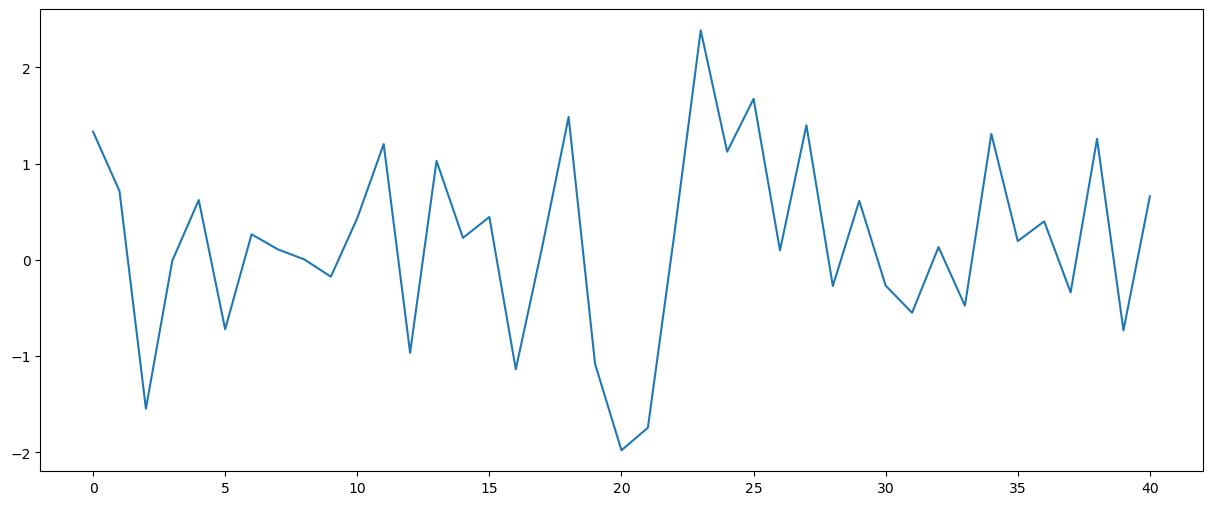

In [21]:
#pritando o gráfico
serie.plot()
plt.show()

In [22]:
#vamos printar os dados em data frame ao invés de gráfico
serie = pd.DataFrame(serie)
serie

,0
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336
5,-0.720086
6,0.265512
7,0.108549
8,0.004291
9,-0.174600


In [23]:
#criando um cabeçalho e pritando apenas as 5 primeiras linhas
serie.columns = ['valores']
serie.head()

,valores
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [24]:
#olhando o número de linhas e colunas 
serie.shape

(41, 1)

In [25]:
#descrição da séries
serie.describe()
#lembrando que quando o valor da média é próximo ao da mediana tende a uma distribuição normal

,valores
count,41.000000
mean,0.183670
std,0.964847
min,-1.977728
25%,-0.337632
50%,0.195013
75%,0.715279
max,2.384967


In [26]:
#mostrar o range de acordo ao comprimento dos dados, a frequência é em anos
indice = pd.date_range('1980', periods = len(serie), freq ="Y")
indice 

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

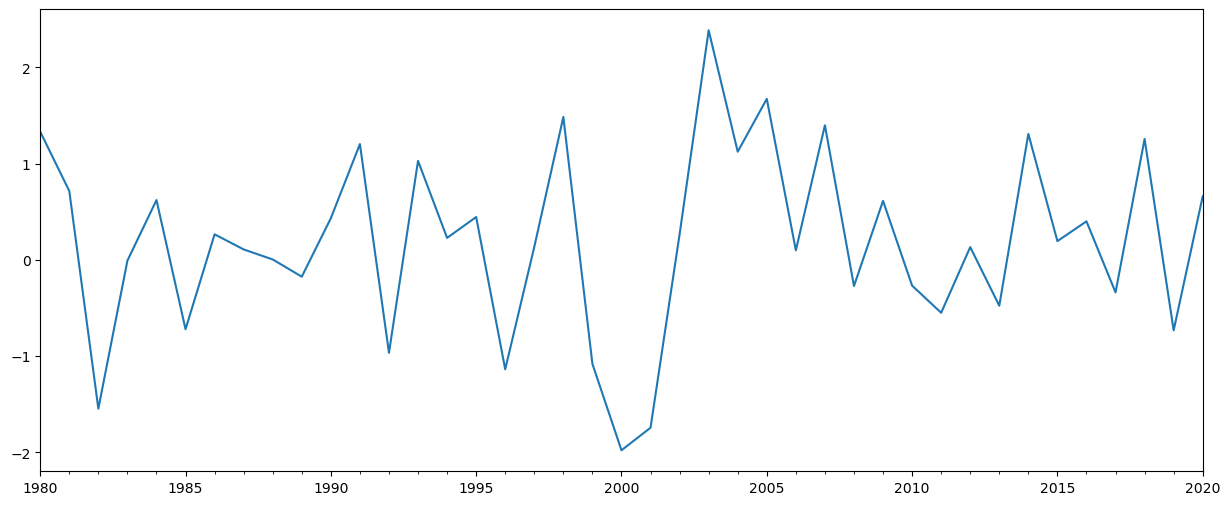

In [27]:
#aqui vamos juntar as duas tabelas de dados que plotamos os dados e as datas 
serie1 = pd.Series(serie['valores'].values, index = indice)
serie1.plot()
plt.show()

In [28]:
import scipy.stats as stats

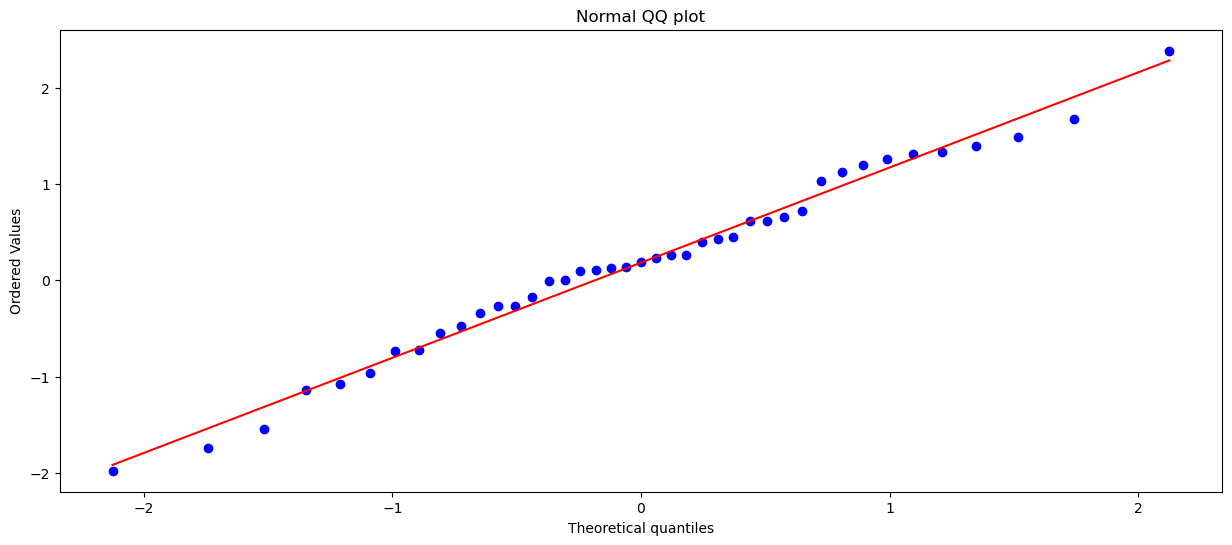

In [29]:
#aqui importamos uma biblioteca pra printar um gráfico de distribuição normal
stats.probplot(serie1, dist = 'norm', plot=plt)
plt.title("Normal QQ plot")
plt.show()

# Teste Shapiro-Wilk
## Critérios:
   ### Nivel de significancia de 0,05 ou 5% 
   ### quando p > 0,005 (distribuição normal)

In [30]:
e, p = stats.shapiro(serie1)
print("Estatística de teste: {}".format(e))
print("p-valor: {} ".format(p))

Estatística de teste: 0.9869343638420105
p-valor: 0.9118920564651489 


# Criando uma série mensal 

In [31]:
#Usando outra semente aleatória(6)
np.random.seed(6)
dados2 = np.random.normal(0,1,72)
dados2 

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ,
        2.63128056,  0.60182225, -0.33588161,  1.23773784,  0.11112817,
        0.12915125,  0.07612761, -0.15512816,  0.63422534,  0.810655  ,
        0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384,
       -1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953,
       -0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143,
       -0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059,
        1.38503523, -0.51962709, -0.78015214,  0.95560959, -0.12673638,
       -1.36861282,  1.21848065, -0.85750144, -0.56147088, -1.0335199 ,
        0.35877096,  1.07368134, -0.37550472,  0.39636757, -0.47144628,
        2.33660781,  1.50278553, -0.59545972,  0.52834106,  0.9398248 ,
        0.42628539, -0.75815703, -0.16236698,  0.72680996,  0.44408297,
       -0.85682264,  0.44692842, -1.01464799, -2.1323234 ,  0.17

In [32]:
#tipo de dados 
type ( dados2)

numpy.ndarray

In [33]:
#criando o dataframe
dados2 = pd.DataFrame(dados2)
dados2 

,0
0,-0.311784
1,0.729004
2,0.217821
3,-0.899092
4,-2.486781
...,...
67,-1.014648
68,-2.132323
69,0.173863
70,0.951201


In [34]:
#momear a coluna
dados2.columns = ['valores']
dados2.head()

,valores
0,-0.311784
1,0.729004
2,0.217821
3,-0.899092
4,-2.486781


In [35]:
dados2.describe()
#media e mediana tem que estar próximas 

,valores
count,72.000000
mean,0.092709
std,1.022496
min,-2.486781
25%,-0.567756
50%,0.151507
75%,0.814155
max,2.631281


In [36]:
#mostrar linhas e colunas 
dados2.shape

(72, 1)

In [37]:
import datetime

In [38]:
#criando um array com apenas uma data
data = np.array('2015-01', dtype = np.datetime64())
data

array('2015-01', dtype='datetime64[M]')

In [39]:
#adicionando 72 datas nesse array 
data = data + np.arange(72)
data 

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
      dtype='datetime64[M]')

In [40]:
#transformar um array em data frame
data = pd.DataFrame(data)
data

,0
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
...,...
67,2020-08-01
68,2020-09-01
69,2020-10-01
70,2020-11-01


In [41]:
#dar um nome a coluna 
data.columns = ['data']
data.head()

,data
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01


In [42]:
data.shape

(72, 1)

In [43]:
#vamos juntar as datas com os dados ( concatenar)
serie2 = pd.concat([data,dados2],axis= 1)
#axis é o eixo (0 ==colunas) (1 == linhas)
serie2

,data,valores
0,2015-01-01,-0.311784
1,2015-02-01,0.729004
2,2015-03-01,0.217821
3,2015-04-01,-0.899092
4,2015-05-01,-2.486781
...,...,...
67,2020-08-01,-1.014648
68,2020-09-01,-2.132323
69,2020-10-01,0.173863
70,2020-11-01,0.951201


In [44]:
serie2 = pd.Series(serie2['valores'].values, index = serie2 ['data'])
serie2

data
2015-01-01   -0.311784
2015-02-01    0.729004
2015-03-01    0.217821
2015-04-01   -0.899092
2015-05-01   -2.486781
                ...   
2020-08-01   -1.014648
2020-09-01   -2.132323
2020-10-01    0.173863
2020-11-01    0.951201
2020-12-01    0.441897
Length: 72, dtype: float64

In [45]:
type(serie2)

pandas.core.series.Series

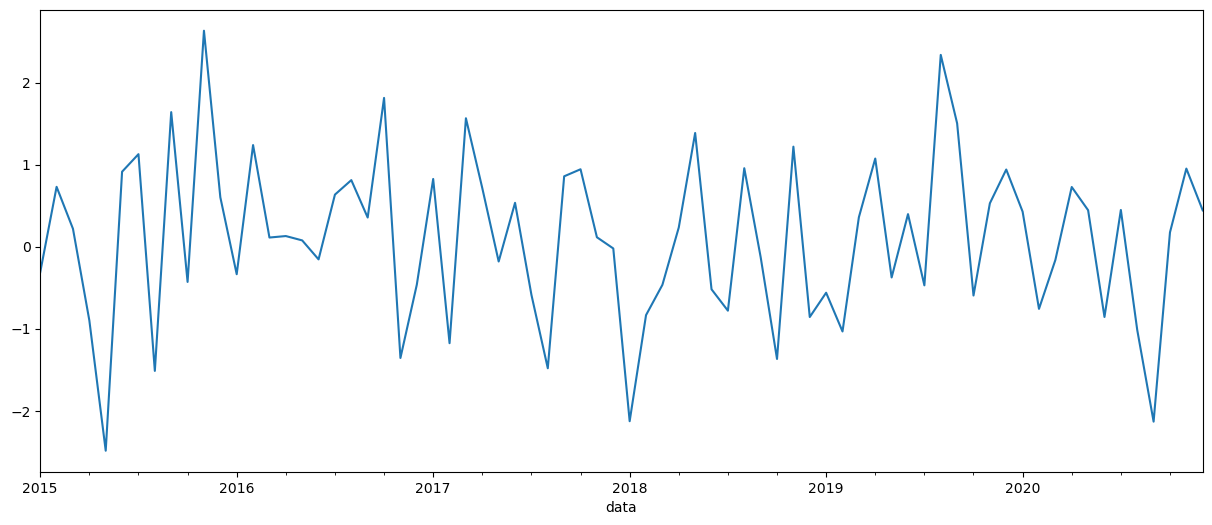

In [46]:
serie2.plot()
plt.show()

#  Análise da normalidade

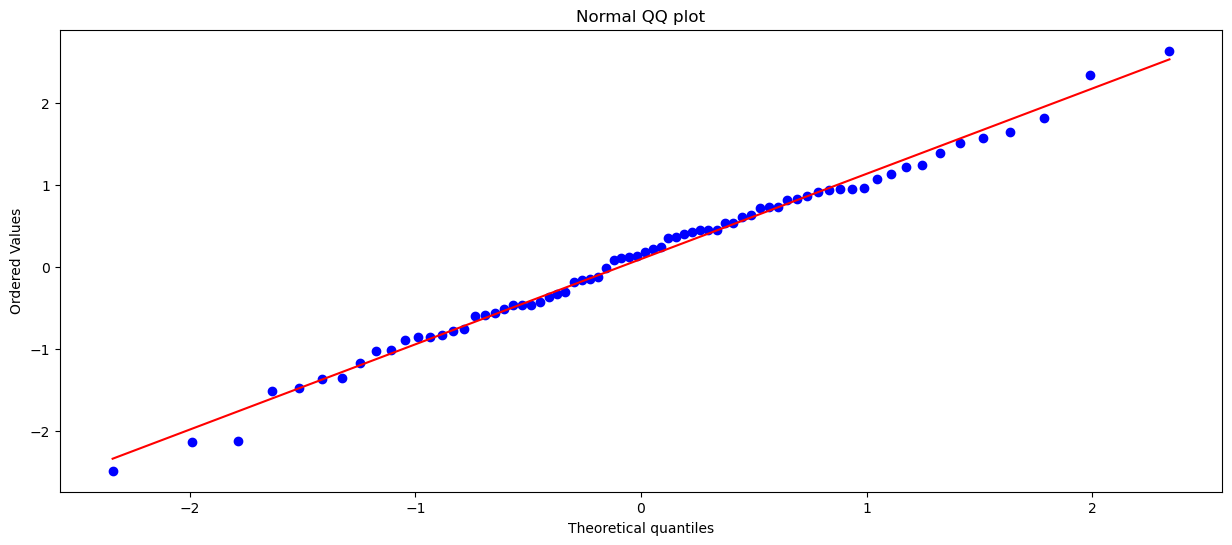

In [47]:
stats.probplot(serie2, dist= 'norm', plot=plt)
plt.title("Normal QQ plot")
plt.show()

# teste de shapiro-wilk 


### CRITÉRIOS:
   ### NÍVEL DE SIGNIFICÂNCIA DE 0,05 OU 5% (MAIS UTILIZADO)
   ### QUANDO p > 0,05 (distribuição normal).

In [48]:
e,p = stats.shapiro(serie2)
print('Estatítistica de teste: {}'.format(e))
print("p-valor: {}".format(p))

Estatítistica de teste: 0.9929383993148804
p-valor: 0.9612120985984802


# Série diária

In [49]:
np.random.seed(12)
#valor de desvio mais alto indica dispersão maior nos dados
dados3 = np.random.normal(0,1,731)
dados3

array([ 4.72985831e-01, -6.81425879e-01,  2.42439497e-01, -1.70073563e+00,
        7.53142834e-01, -1.53472134e+00,  5.12707813e-03, -1.20227670e-01,
       -8.06981879e-01,  2.87181939e+00, -5.97822919e-01,  4.72456994e-01,
        1.09595612e+00, -1.21516880e+00,  1.34235637e+00, -1.22149788e-01,
        1.01251548e+00, -9.13869147e-01, -1.02953021e+00,  1.20979645e+00,
        5.01872304e-01,  1.38846177e-01,  6.40761113e-01,  5.27332665e-01,
       -1.15436024e+00, -2.21333348e+00, -1.68175651e+00, -1.78809425e+00,
       -2.21853495e+00, -6.47430780e-01, -5.28404321e-01, -3.92091748e-02,
        2.14975948e-01, -3.84358803e-01, -2.53904078e-01,  7.32520746e-02,
       -9.97203837e-01, -7.13856288e-01,  3.54163461e-02, -6.77945365e-01,
       -5.71881062e-01, -1.05862315e-01,  1.33583134e+00,  3.18665288e-01,
       -3.37595250e-01, -5.85268278e-01, -1.14919941e-01,  2.24181779e+00,
       -3.14741652e+00,  5.35135893e-01,  2.32490439e-01,  8.67611951e-01,
       -1.14821271e+00,  

In [50]:
type(dados3)

numpy.ndarray

In [51]:
dados3 = pd.DataFrame(dados3)
dados3.columns = ['valores']
dados3.head()

,valores
0,0.472986
1,-0.681426
2,0.242439
3,-1.700736
4,0.753143


In [52]:
dados3.describe()

,valores
count,731.000000
mean,-0.033516
std,1.010658
min,-3.710679
25%,-0.733966
50%,0.023273
75%,0.666789
max,3.166557


In [53]:
dados3.shape

(731, 1)

In [54]:
indice3 = pd.date_range('2019 Jan 1', periods = len(dados3), freq = 'D')
indice3 

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')

In [55]:
serie3 = pd.Series(dados3['valores'].values, index  = indice3 )

In [56]:
type(serie3)

pandas.core.series.Series

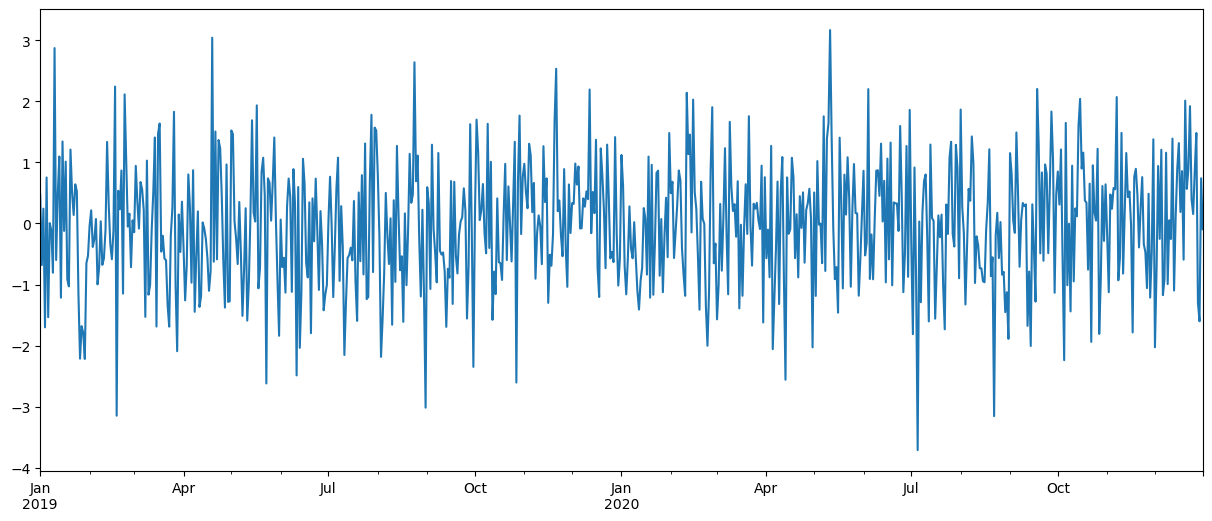

In [57]:
serie3.plot()
plt.show()

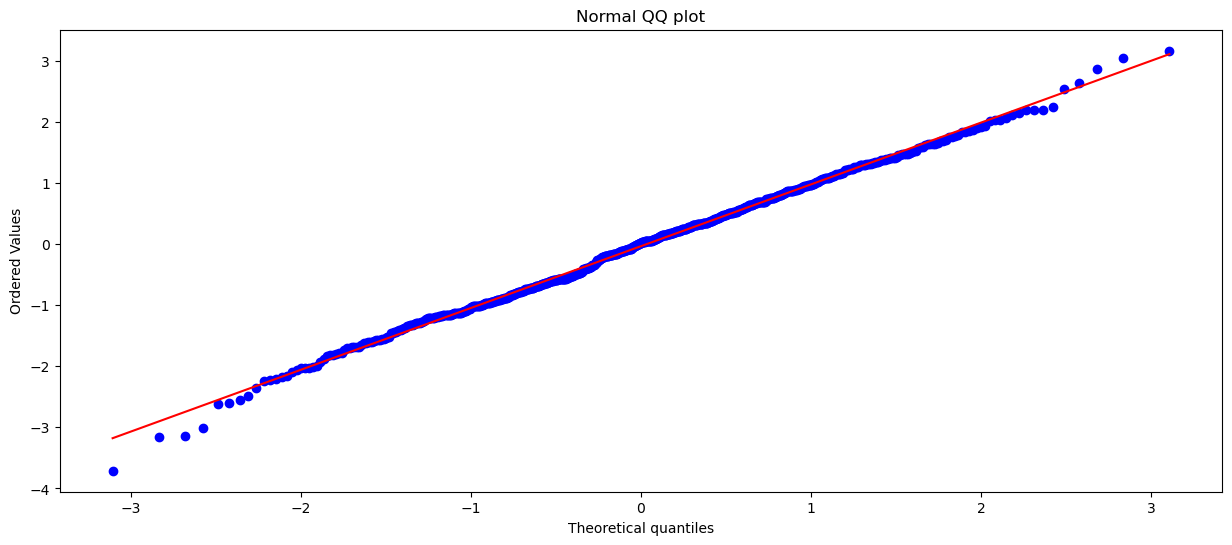

In [58]:
#verificar se a distribuição é normal 
stats.probplot(serie3,dist ="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

### teste de shapiro-wilk
### critérios:
### nível de significância de 0,005 ou 5% (mais utilizado)
### Quando p> 0,005 (distribuição normal)

In [59]:
e,p = stats.shapiro(serie3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))


Estatística de teste: 0.9977782964706421
p-valor: 0.44908666610717773


# Série Trimestral

In [60]:
np.random.seed(20)
dados4 = np.random.normal(0,1,164)
dados4

array([ 8.83893113e-01,  1.95865022e-01,  3.57536516e-01, -2.34326191e+00,
       -1.08483259e+00,  5.59696289e-01,  9.39469350e-01, -9.78481042e-01,
        5.03096840e-01,  4.06414469e-01,  3.23461010e-01, -4.93410882e-01,
       -7.92016791e-01, -8.42367934e-01, -1.27950266e+00,  2.45715170e-01,
       -4.41948007e-02,  1.56763255e+00,  1.05110868e+00,  4.06368426e-01,
       -1.68646101e-01, -3.18970279e+00,  1.12013226e+00,  1.33277821e+00,
       -2.43338766e-01, -1.30030711e-01, -1.09017371e-01,  1.55618644e+00,
        1.28778353e-01, -2.06694872e+00, -8.85493155e-01, -1.10457948e+00,
        9.32866347e-01,  2.05983800e+00, -9.34937958e-01, -1.61299022e+00,
        5.27069718e-01, -1.55110074e+00,  3.29613339e-01, -1.13652654e+00,
       -3.38490605e-01,  3.20970784e-01, -6.02308018e-01,  1.54472836e+00,
        6.47034084e-01,  5.93217213e-01,  4.38024497e-01,  1.35778902e+00,
        1.20451128e+00,  1.35179619e+00,  4.93437236e-01, -2.70436525e+00,
       -5.55185797e-01,  

In [61]:
dados4 = pd.DataFrame(dados4)
dados4.columns = ['valores']
dados4.head()

,valores
0,0.883893
1,0.195865
2,0.357537
3,-2.343262
4,-1.084833


In [62]:
dados4.describe()

,valores
count,164.000000
mean,0.019060
std,1.051344
min,-3.189703
25%,-0.801186
50%,0.148101
75%,0.761434
max,2.094665


In [63]:
dados4.shape

(164, 1)

In [64]:
indice4 = pd.date_range('1980-01', periods = len(dados4), freq = '3M')
indice4

DatetimeIndex(['1980-01-31', '1980-04-30', '1980-07-31', '1980-10-31',
               '1981-01-31', '1981-04-30', '1981-07-31', '1981-10-31',
               '1982-01-31', '1982-04-30',
               ...
               '2018-07-31', '2018-10-31', '2019-01-31', '2019-04-30',
               '2019-07-31', '2019-10-31', '2020-01-31', '2020-04-30',
               '2020-07-31', '2020-10-31'],
              dtype='datetime64[ns]', length=164, freq='3M')

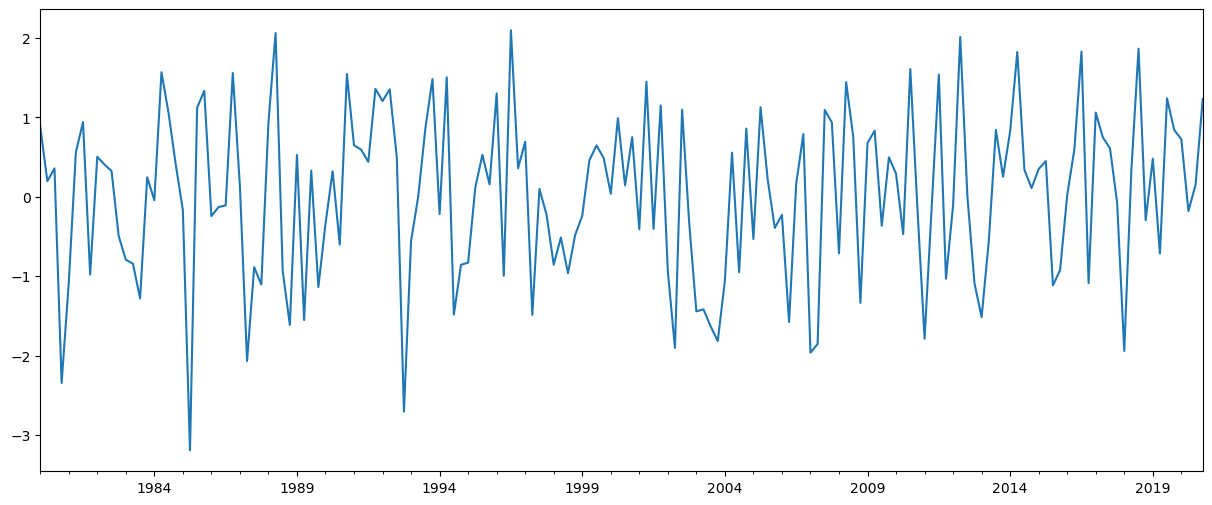

In [65]:
serie4 = pd.Series(dados4 ['valores'].values, index = indice4)
serie4.plot()
plt.show()

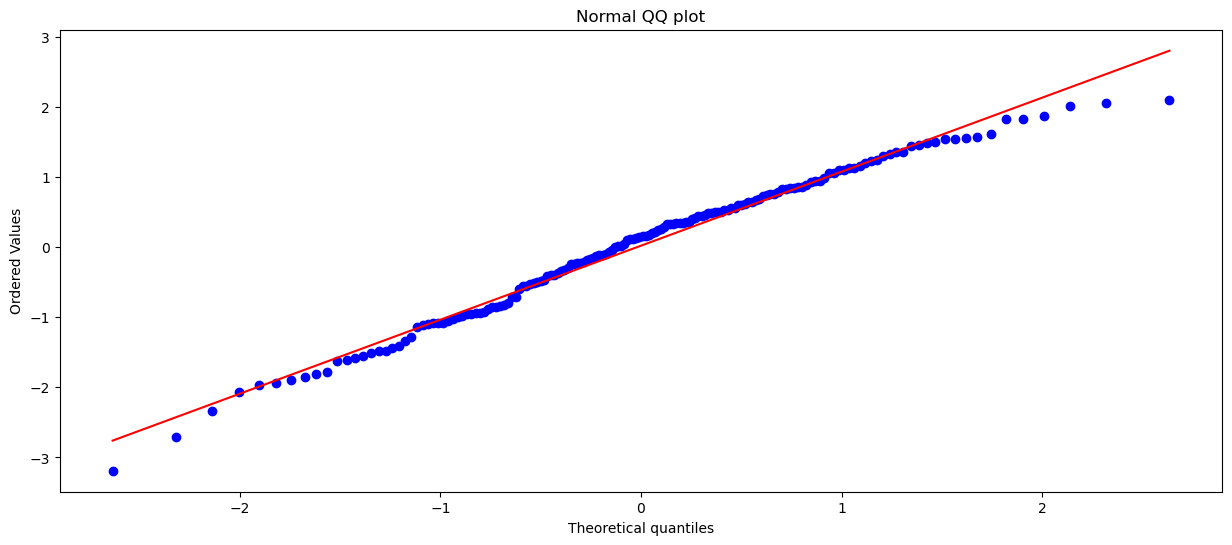

In [66]:
stats.probplot(serie4, dist ="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

# Teste de shapiro-Wilk
## critérios:
## Nível de significância de 0,05 ou 5% (mais utilizado)
## Quando p> 0,05 (distribuição normal)

In [67]:
e, p = stats.shapiro(serie4)
print("Estatística de teste: {}".format(e))
print("p-valor: {} ".format(p))

Estatística de teste: 0.9852808713912964
p-valor: 0.08074674010276794 
